In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("salary.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.5,37731
2,2.0,43525
3,2.9,56642
4,3.0,60150


In [4]:
X=np.array(data['YearsExperience'])
X

array([ 1.1,  1.5,  2. ,  2.9,  3. ,  3.2,  3.9,  4. ,  4.5,  5.9,  6. ,
        6.8,  7.9,  8.7,  9. , 10.5])

In [5]:
Y=np.array(data['Salary'])
Y

array([ 39343,  37731,  43525,  56642,  60150,  54445,  63218,  56957,
        61111,  81363,  93940,  91738, 101302, 109431, 105582, 121872],
      dtype=int64)

In [15]:
def cost(m,c): 
    
    total_cost=0
    for i in range(0,len(data)):
        
        total_cost+=(Y[i]-((m*X[i]+c)))**2 
        
    total_cost=1/len(data)*total_cost
    return total_cost #19.9
        

In [16]:
def grad_val(m,c,lr): #0,0,0.0001
    
    gradient_m=0 
    gradient_c=0 
    n=len(data)
    for i in range(0,len(data)):
        gradient_m+=(-2/n)*(X[i])*(Y[i]-m*X[i]+c)
        
        gradient_c+=(-2/n)*(Y[i]-m*X[i]+c)
        
    new_m=m-lr*gradient_m  #10
    new_c=c-lr*gradient_c #20
    
    return new_m,new_c #10,20


In [19]:
def stck(initial_m,initial_c,learning_rate,num_itr):
    
    costs=[] 
    
    progress_m=[]
    progress_c=[]
    
    lr=learning_rate
    
    m=initial_m #m=0
    c=initial_c #c=0
    
    for i in range(0,num_itr):
        costs.append(cost(m,c)) #19.9
        
        m,c=grad_val(m,c,lr)  #10,20
        progress_m.append(m) #10
        progress_c.append(c) #20
        
    print('Costs\n',costs)
    print('m value\n',progress_m)
    print('c Values\n',progress_c)
    
    plt.plot(costs)
    plt.xlabel('No of iteration')
    plt.ylabel('Costs')
    plt.title('Cost per iteration')
    plt.show()
    

Costs
 [73646.875, -202539.1527228884, -1023950.4828608651, -2379988.615594738, -4260215.420659547, -6654350.908265379, -9552271.029903837, -12944005.508646125, -16819735.69854385, -21169792.472748764]
m value
 [88.81208625000001, 177.04739036036045, 264.70966708321106, 351.80264672831765, 438.33003532219516, 524.2955147661844, 609.7027429935005, 694.5553541252582, 778.8569586254819, 862.6111434551068]
c Values
 [14.729375000000001, 29.37188465277969, 43.92809485620833, 58.398567824341676, 72.78386211140254, 87.08453263560526, 101.30113070282508, 115.43420403011346, 129.4842967690603, 143.4519495290041]


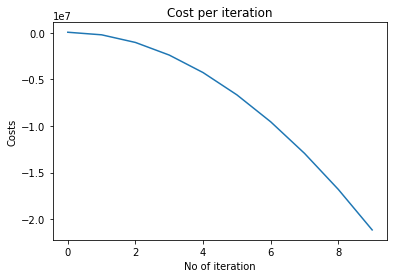

In [20]:
initial_m=0
initial_c=0
learning_rate=0.0001
num_itr=200

stck(initial_m,initial_c,learning_rate,num_itr)